In [1]:
# Cell 1 - imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

sns.set(style='whitegrid')

In [2]:
# Cell 2 - Load dataset
# Make sure the dataset is in your working directory
df = pd.read_csv('sales_data_sample.csv', encoding='ISO-8859-1')

print("Shape:", df.shape)
df.head()

Shape: (2823, 25)


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [3]:
# Cell 3 - Dataset overview
df.info()
print("\nColumns:\n", df.columns.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [4]:
['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'SALES', 'ORDERDATE',
 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE',
 'MSRP', 'CUSTOMERNAME', 'COUNTRY', 'DEALSIZE']

['ORDERNUMBER',
 'QUANTITYORDERED',
 'PRICEEACH',
 'SALES',
 'ORDERDATE',
 'STATUS',
 'QTR_ID',
 'MONTH_ID',
 'YEAR_ID',
 'PRODUCTLINE',
 'MSRP',
 'CUSTOMERNAME',
 'COUNTRY',
 'DEALSIZE']

In [5]:
# Cell 4 - Feature selection
features = ['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP', 'QTR_ID', 'MONTH_ID', 'YEAR_ID']
data = df[features].dropna()   # drop missing values if any
print("Shape after selecting numeric features:", data.shape)

# Optional: show summary
data.describe()

Shape after selecting numeric features: (2823, 7)


,QUANTITYORDERED,PRICEEACH,SALES,MSRP,QTR_ID,MONTH_ID,YEAR_ID
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000
mean,35.092809,83.658544,3553.889072,100.715551,2.717676,7.092455,2003.81509
std,9.741443,20.174277,1841.865106,40.187912,1.203878,3.656633,0.69967
min,6.000000,26.880000,482.130000,33.000000,1.000000,1.000000,2003.00000
25%,27.000000,68.860000,2203.430000,68.000000,2.000000,4.000000,2003.00000
50%,35.000000,95.700000,3184.800000,99.000000,3.000000,8.000000,2004.00000
75%,43.000000,100.000000,4508.000000,124.000000,4.000000,11.000000,2004.00000
max,97.000000,100.000000,14082.800000,214.000000,4.000000,12.000000,2005.00000


In [6]:
# Cell 5 - Scaling
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

print("Scaled data shape:", data_scaled.shape)

Scaled data shape: (2823, 7)


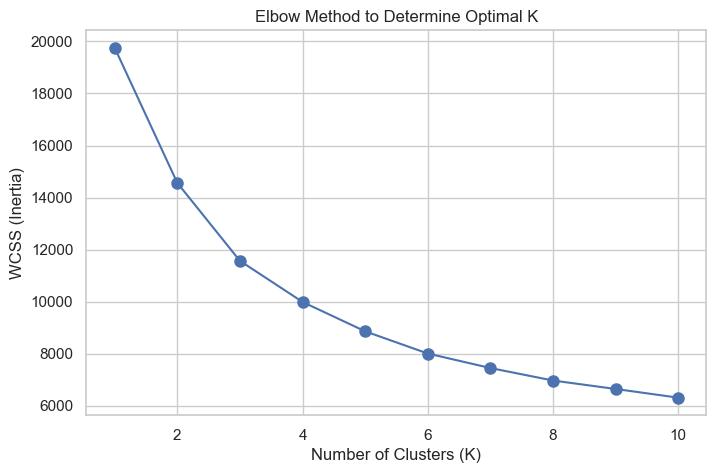

In [7]:
# Cell 6 - Elbow method
wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)  # inertia_ = within-cluster sum of squares

plt.figure(figsize=(8,5))
plt.plot(K_range, wcss, 'bo-', markersize=8)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method to Determine Optimal K')
plt.show()

In [8]:
# Cell 7 - K-Means model
optimal_k = 3   # change based on elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(data_scaled)

# Add cluster labels to dataframe
data['Cluster'] = kmeans.labels_
print(data['Cluster'].value_counts())

Cluster
0    1043
2     930
1     850
Name: count, dtype: int64


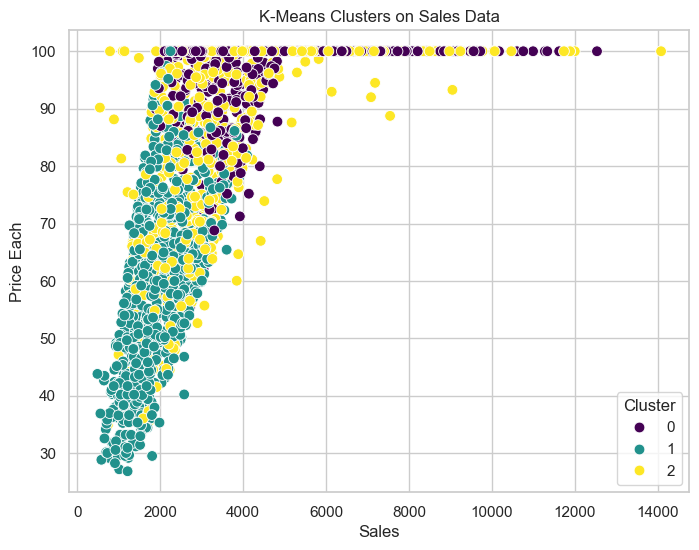

In [9]:
# Cell 8 - Cluster visualization
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=data['SALES'], y=data['PRICEEACH'],
    hue=data['Cluster'], palette='viridis', s=60
)
plt.title('K-Means Clusters on Sales Data')
plt.xlabel('Sales')
plt.ylabel('Price Each')
plt.legend(title='Cluster')
plt.show()

In [10]:
# Cell 9 - Cluster centers
centroids = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),  # back to original scale
    columns=features
)
print("Cluster Centroids:\n")
display(centroids)

Cluster Centroids:



,QUANTITYORDERED,PRICEEACH,SALES,MSRP,QTR_ID,MONTH_ID,YEAR_ID
0,35.513902,97.404382,4491.454276,124.015340,3.606903,9.767977,2003.518696
1,33.301176,60.544282,1992.136341,63.889412,3.117647,8.325882,2003.615294
2,36.258065,89.368452,3929.813065,108.243011,1.354839,2.964516,2004.330108


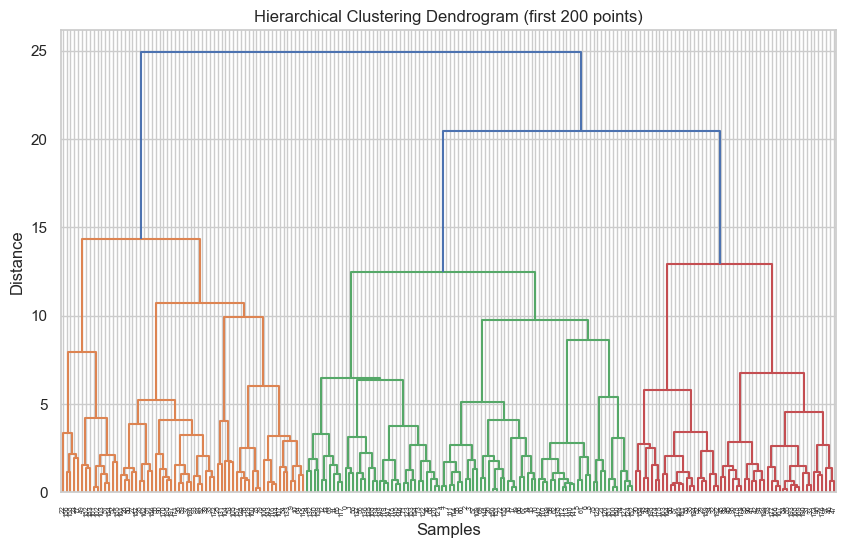

In [11]:
# Cell 10 - Hierarchical clustering (optional)
# Use linkage to build hierarchy and plot dendrogram
plt.figure(figsize=(10, 6))
linkage_matrix = linkage(data_scaled[:200], method='ward')  # subset to avoid overcrowding
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram (first 200 points)")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

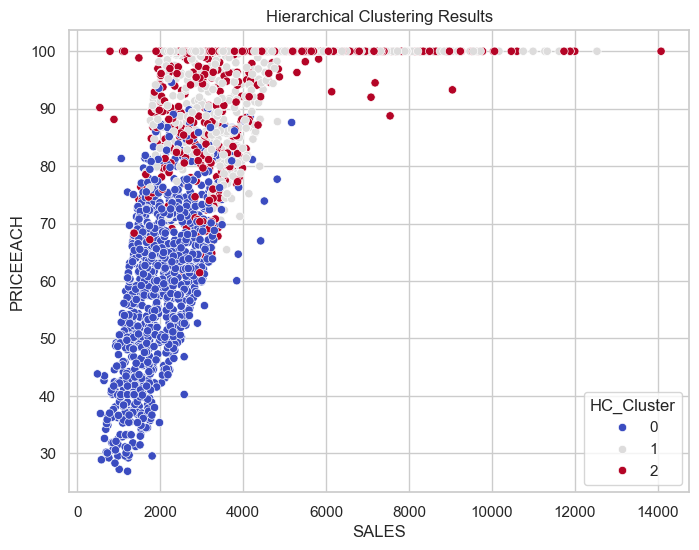

In [12]:
# Cell 11 - Agglomerative clustering
hc = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
data['HC_Cluster'] = hc.fit_predict(data_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=data['SALES'], y=data['PRICEEACH'], hue=data['HC_Cluster'], palette='coolwarm')
plt.title('Hierarchical Clustering Results')
plt.show()

In [13]:
# Cell 12 - Comparison
comparison = pd.crosstab(data['Cluster'], data['HC_Cluster'])
print("Cluster Cross-Comparison:\n")
display(comparison)

Cluster Cross-Comparison:



HC_Cluster,0,1,2
Cluster,,,
0,26,944,73
1,753,69,28
2,175,55,700
